width: 2121 height: 6713
83,10% - 82,51%
89,56% - 88,17%
67,61% - 62,26%
71,48% - 68,69%
84,54% - 82,82%
87,14% - 88,48%
85,61% - 86,89%
91,76% - 94,19%
80,30% - 79,20%
87,46% - 87,49%
85,02% - 85,33%
86,37% - 84,79%
80,89% - 77,42%
92,10% - 90,04%
82,18% - 80,85%
74,44% - 73,96%
83,78% - 83,27%
85,73% - 81,67%
75,95% - 73,94%
85,34% - 86,34%
90,02% - 90,10%
62,89% - 59,71%
81,05% - 78,54%
81,74% - 82,54%
78,26% - 83,31%
84,78% - 82,67%
89,46% - 89,12%
75,55% - 74,61%
77,83% - 78,16%
77,61% - 74,68%
88,59% - 86,71%
78,47% - 85,84%
78,63% - 76,09%
79,92% - 80,78%
83,00% - 80,95%
80,99% - 79,45%
66,81% - 63,69%
72,77% - 76,25%
84,24% - 82,89%
86,19% - 85,86%
86,66% - 84,41%
80,61% - 78,49%
87,15% - 85,54%
81,82% - 85,03%
85,58% - 82,25%
78,15% - 77,78%
81,53% - 82,05%
82,20% - 83,01%
81,28% - 78,23%


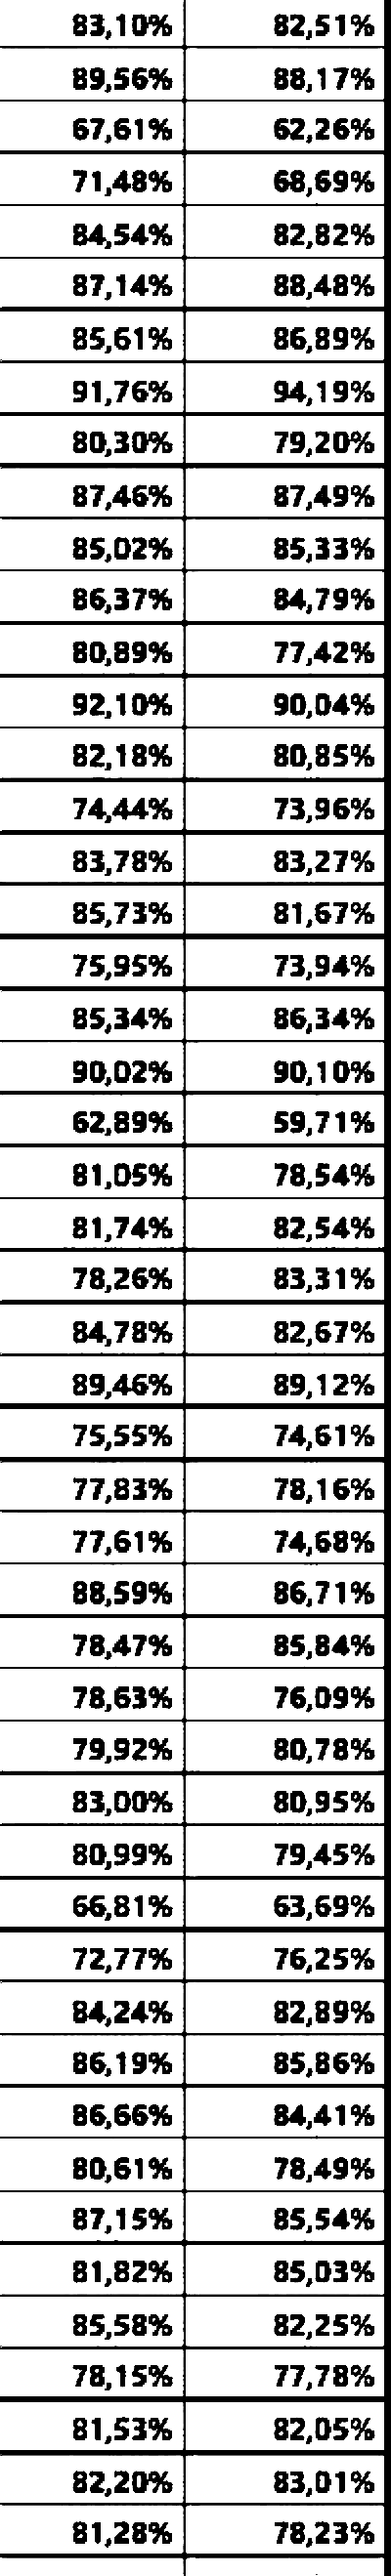

In [22]:
import io
import fitz
import numpy as np
from PIL import Image, ImageOps, ImageFilter, ImageEnhance
import pytesseract

zoom = 4
mat = fitz.Matrix(zoom, zoom)
config = r'--oem 3 --psm 12 -c tessedit_char_whitelist=0123456789,%'

def read2(file, pageNumber):
    pdf = fitz.open(file)
    page = pdf.load_page(pageNumber)
    pixmap = page.get_pixmap(alpha=False, matrix=mat).tobytes()
    image = Image.open(io.BytesIO(pixmap))
    invert_im = image.convert("RGB")
    invert_im = ImageOps.invert(invert_im)
    imageBox = invert_im.getbbox()
    cropped = image.crop(imageBox)
    aspect_ratio = cropped.height / cropped.width
    new_width = 2121
    new_height = int(new_width * aspect_ratio)
    resized = cropped.resize((new_width, new_height), Image.NEAREST)
    print('width:', resized.width, 'height:', resized.height)
    
    image_arr = np.array(resized)

    # Crop image
    image_arr = image_arr[730:image.height, 1500:1900]

    # Convert array to image
    image = Image.fromarray(image_arr)
    im2 = image.convert('L')
    im2 = im2.filter(ImageFilter.MinFilter(1))
    im2 = im2.filter(ImageFilter.SMOOTH_MORE)
    #im2 = im2.filter(ImageFilter.SMOOTH_MORE)
    enhancer = ImageEnhance.Contrast(im2)
    im2 = enhancer.enhance(5)
    #im2 = im2.filter(ImageFilter.SHARPEN)
    im2 = im2.filter(ImageFilter.SHARPEN)
    im2 = im2.filter(ImageFilter.MinFilter(1))
    im2 = ImageOps.invert(im2)
    enhancer = ImageEnhance.Brightness(im2)
    im2 = enhancer.enhance(3)
    results = pytesseract.image_to_string(im2, config=config)
    a_list = results.split('\n')
    out = [i for i in a_list if i]
    out.remove('\x0c')
    it = iter(out)
    data = list(zip(it, it))
    for tuple_ in data:
        print(tuple_[0], '-', tuple_[1])
    display(im2)

read2('./data/report.pdf', 4)